# Impermanent Loss

## The value of an AMM pool
Assume $x_0$ and $y_0$ is the initial reserve of an AMM pool. Thus, $k_0=xy$. Plus, Y is the base currency of crypto currency X. The value of X per unit should be:
\begin{align*}
\frac{\partial y}{\partial x} &= \frac{k}{x^2}=\frac yx= \frac{y^2}{k}
\end{align*}

The total value of X should be:
\begin{align*}
V_x = \frac yx x = y
\end{align*}

The total value of the AMM pool should be:
\begin{align*}
V = 2y
\end{align*}

## Calculate the impermanent loss

Consider that currently the AMM pool has $y$ unit of Y in its reserve, if we hold the initial asset:
\begin{align*}
V_{hold} &= y_0 +\frac{y^2}{x_0 y_0} x_0\\
&= y_0 + \frac{y^2}{y_0}
\end{align*}

if we put the initial asset into the pool:
\begin{align*}
V_{farm} = 2y
\end{align*}

Thus, the impermanent loss should be:
\begin{align*}
Loss &= \frac{V_{farm}}{V_{hold}}\\
&= \frac{2yy_0}{y_0^2+y^2}
\end{align*}

\begin{align*}
\end{align*}

<IPython.core.display.Javascript object>


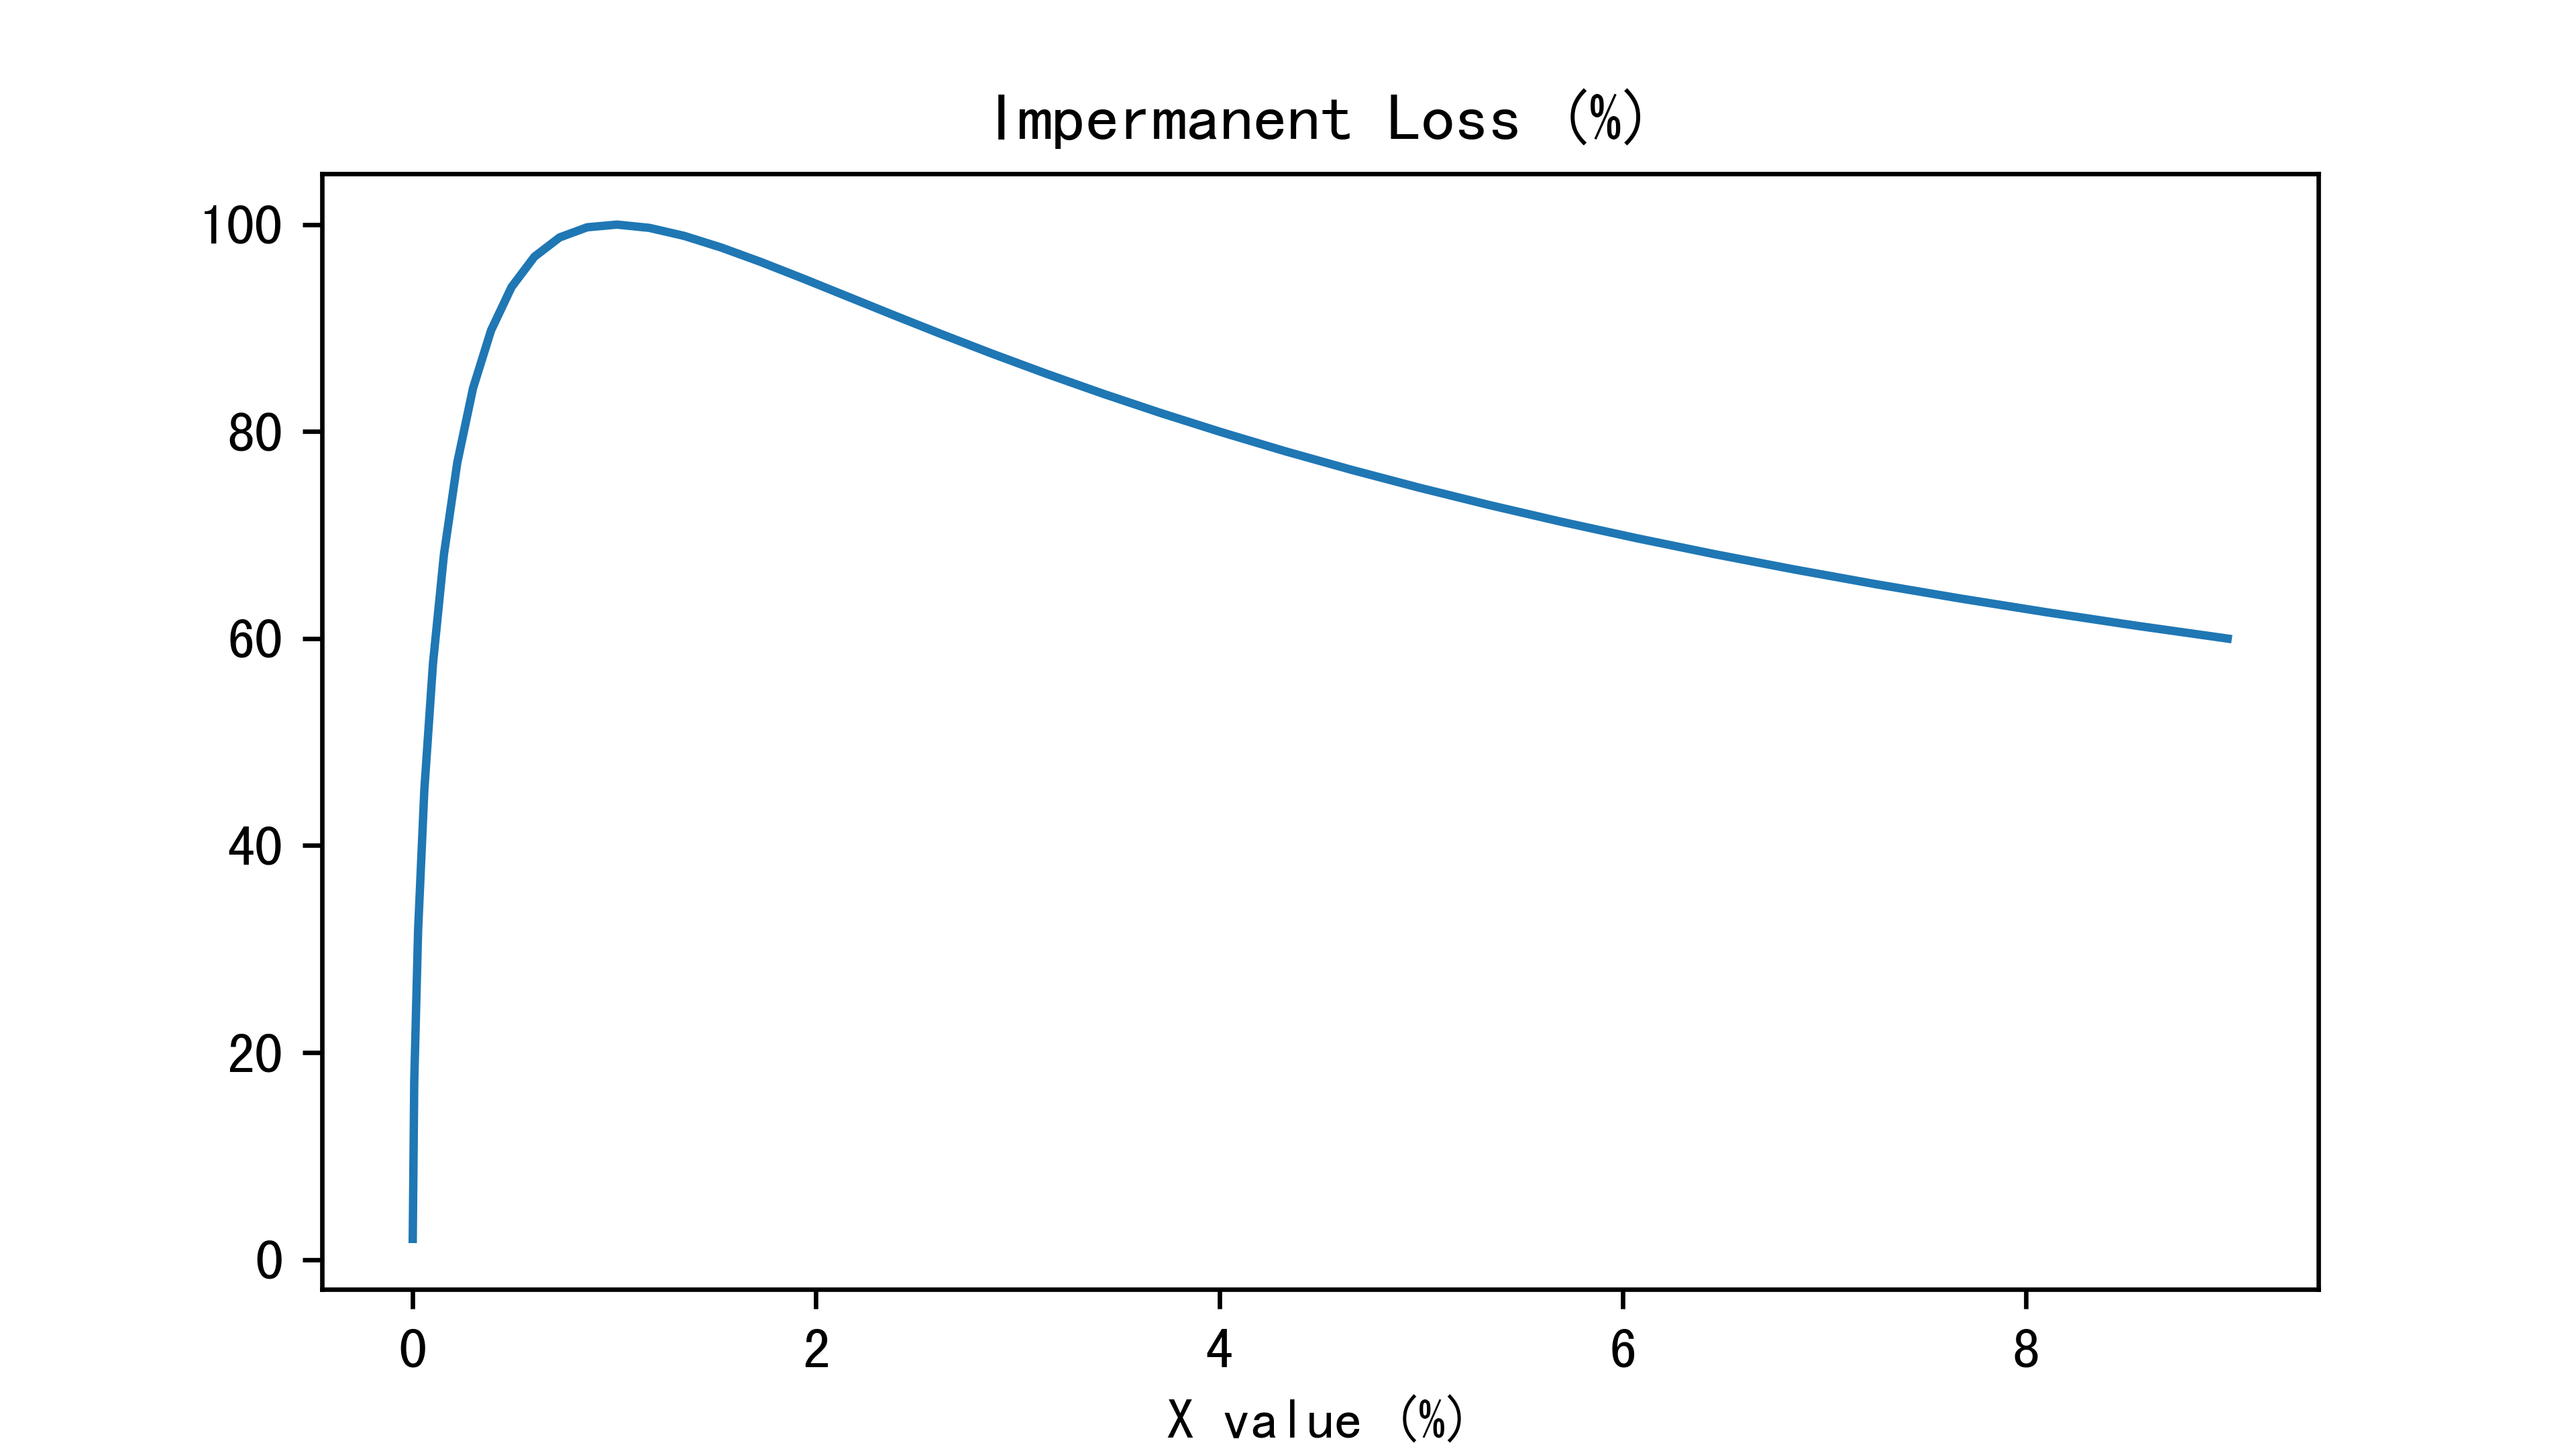

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
y0 = 100
x0 = 10
k = y0*x0
s0 = y0/x0
y = np.linspace(1,300,40)
imp_loss = 2*y*y0/(y0**2+y**2)
my_dpi = 300
plt.figure(figsize=(1920/my_dpi, 1080/my_dpi), dpi=my_dpi)
plt.plot(y**2/k/x0,imp_loss*100)
plt.title("Impermanent Loss (%)")
plt.xlabel("X value (%)")
plt.savefig("IL.png",dpi = my_dpi)
plt.show()

In [2]:
y**2/k/x0

array([1.00000000e-04, 7.51111111e-03, 2.66777778e-02, 5.76000000e-02,
       1.00277778e-01, 1.54711111e-01, 2.20900000e-01, 2.98844444e-01,
       3.88544444e-01, 4.90000000e-01, 6.03211111e-01, 7.28177778e-01,
       8.64900000e-01, 1.01337778e+00, 1.17361111e+00, 1.34560000e+00,
       1.52934444e+00, 1.72484444e+00, 1.93210000e+00, 2.15111111e+00,
       2.38187778e+00, 2.62440000e+00, 2.87867778e+00, 3.14471111e+00,
       3.42250000e+00, 3.71204444e+00, 4.01334444e+00, 4.32640000e+00,
       4.65121111e+00, 4.98777778e+00, 5.33610000e+00, 5.69617778e+00,
       6.06801111e+00, 6.45160000e+00, 6.84694444e+00, 7.25404444e+00,
       7.67290000e+00, 8.10351111e+00, 8.54587778e+00, 9.00000000e+00])

In [3]:
imp_loss

array([0.019998  , 0.17204111, 0.31817837, 0.45385779, 0.57561222,
       0.68126708, 0.76992383, 0.84177388, 0.89782266, 0.93959732,
       0.96888883, 0.98755272, 0.99737251, 0.99997793, 0.99680511,
       0.98908595, 0.97785548, 0.9639694 , 0.94812592, 0.93088858,
       0.91270793, 0.89394107, 0.87486858, 0.85570902, 0.83663086,
       0.81776252, 0.79920036, 0.78101532, 0.76325822, 0.745964  ,
       0.72915516, 0.71284448, 0.6970372 , 0.68173278, 0.66692626,
       0.65260936, 0.63877135, 0.62539972, 0.61248078, 0.6       ])

In [5]:
import pandas as pd
pd.DataFrame([y**2/k/x0,imp_loss]).T

,0,1
0,0.000100,0.019998
1,0.007511,0.172041
2,0.026678,0.318178
3,0.057600,0.453858
4,0.100278,0.575612
5,0.154711,0.681267
6,0.220900,0.769924
7,0.298844,0.841774
8,0.388544,0.897823
9,0.490000,0.939597


# Hedging

## Straddle

<IPython.core.display.Javascript object>


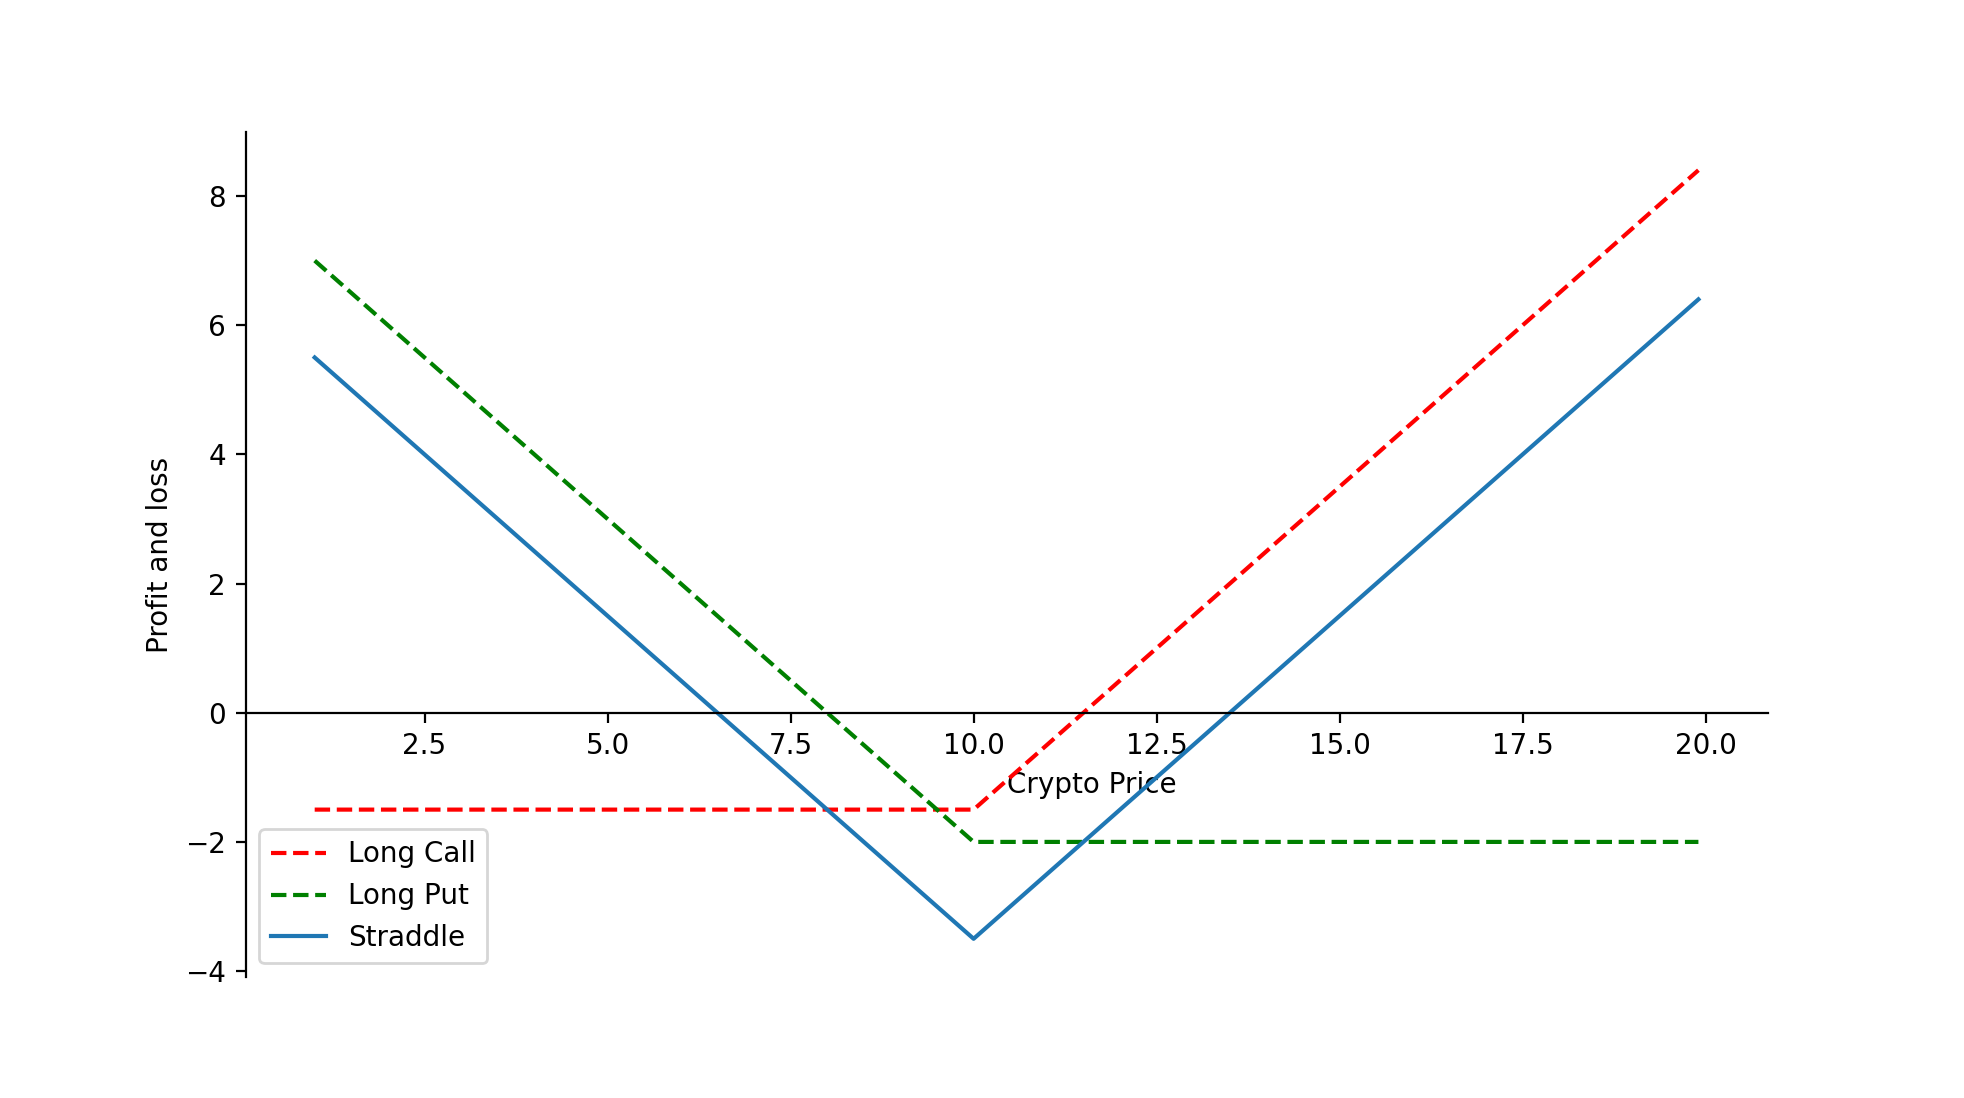

In [23]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn


spot_price = 10 
# Long put
strike_price_long_put = 10
premium_long_put = 2
# Long call
strike_price_long_call = 10
premium_long_call = 1.5
# Stock price range at expiration of the put
sT = np.arange(1,2*spot_price,0.1)

def put_payoff(sT, strike_price, premium):
    return np.where(sT < strike_price, strike_price - sT, 0) - premium 
def call_payoff(sT, strike_price, premium):
    return np.where(sT > strike_price, sT - strike_price, 0) - premium

payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
payoff_long_call = call_payoff (sT, strike_price_long_call, premium_long_call)
payoff_straddle = payoff_long_call + payoff_long_put

# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed 
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center

ax.plot(sT,payoff_long_call,'--',label='Long Call',color='r')
ax.plot(sT,payoff_long_put,'--',label='Long Put',color='g')

ax.plot(sT,payoff_straddle,label='Straddle')
plt.xlabel('Crypto Price', ha='left')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

## Straddle Delta

\begin{align*}
\Delta_{call} = \Phi(d_+)\\
\Delta_{put} = -\Phi(-d_+)
\end{align*}
where
\begin{align*}
d_+ = \frac{log(\frac SK)+(r+\frac{\sigma^2}{2})T}{\sigma \sqrt{T}}
\end{align*}

<IPython.core.display.Javascript object>


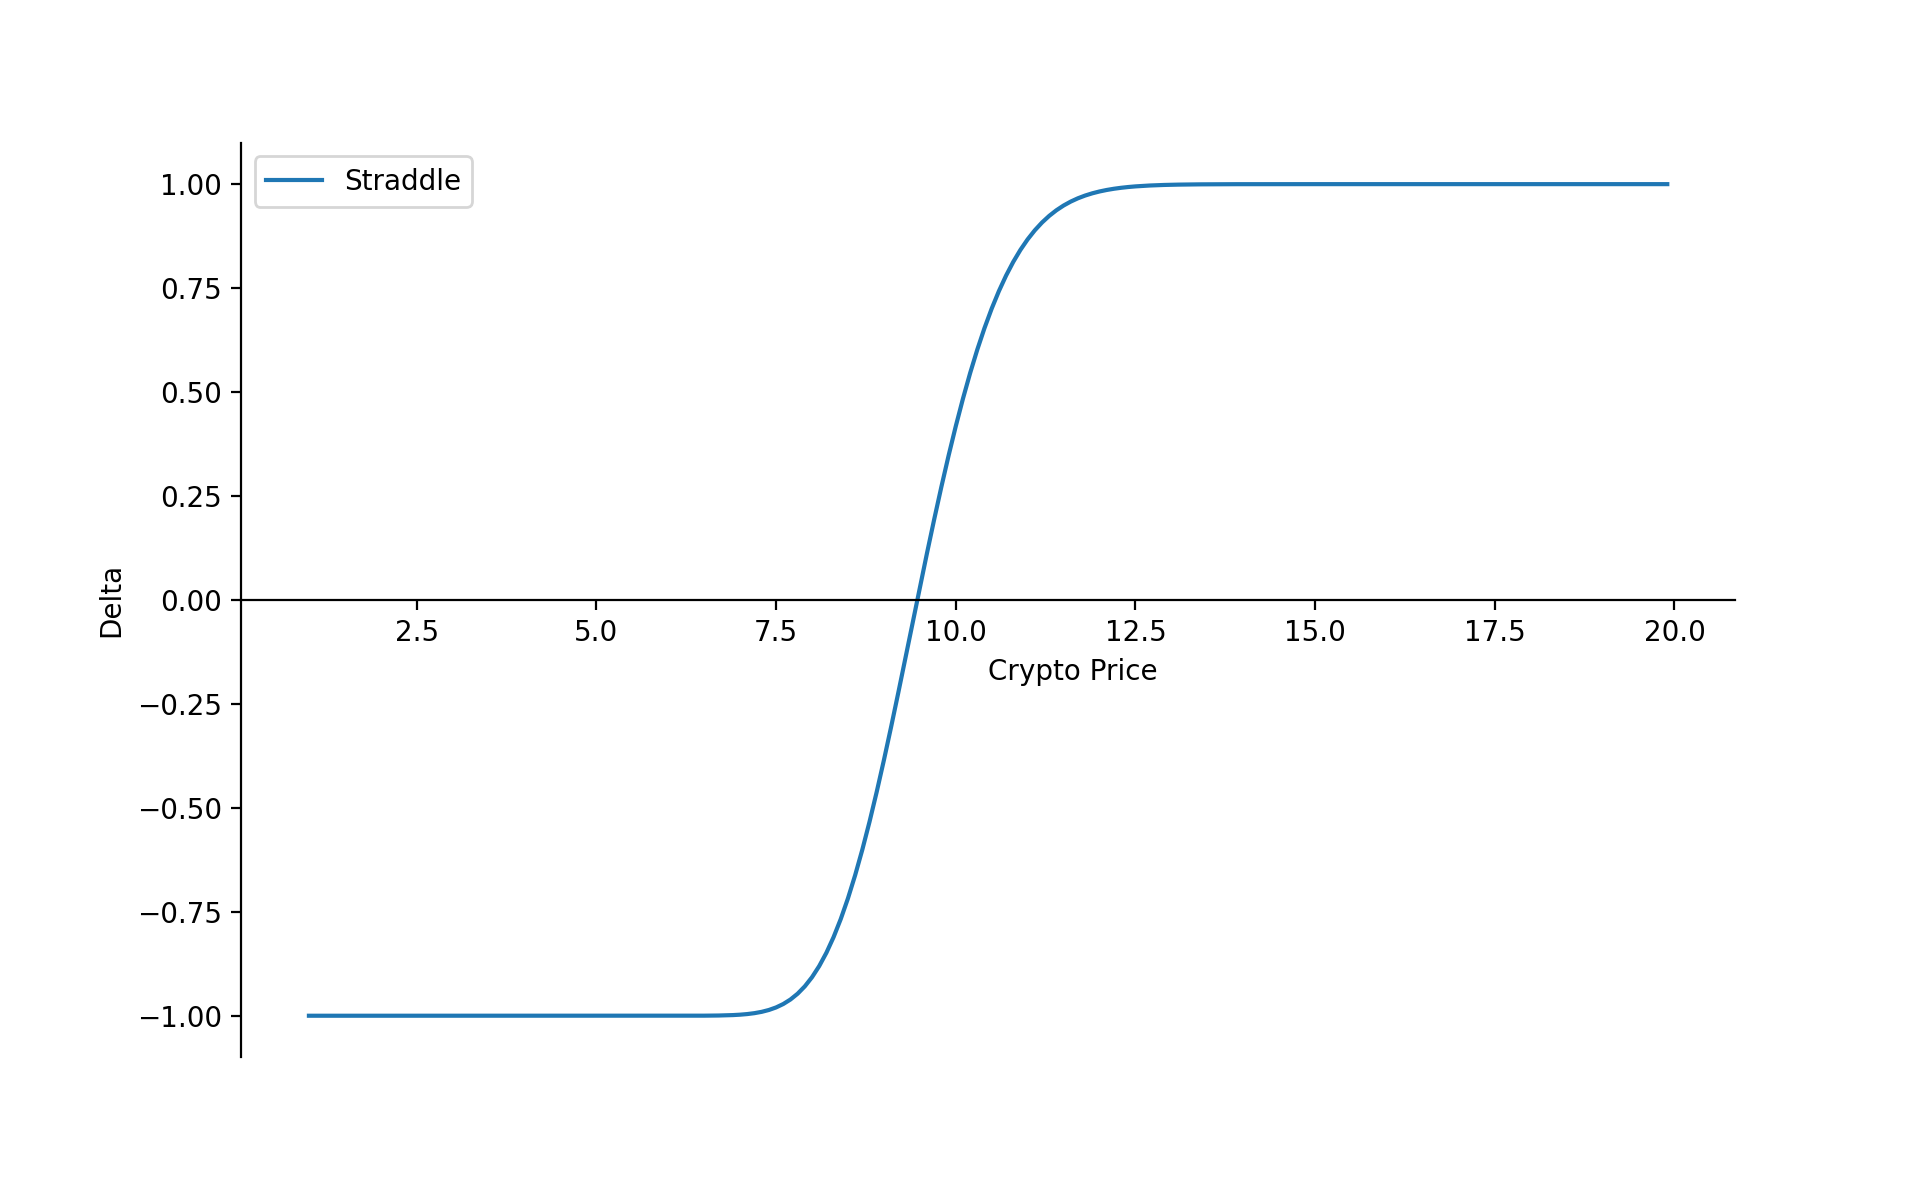

In [33]:
import numpy as np
from scipy.stats import norm

def d1(s,k,r,sigma,T):
    return (np.log(s/k)+(r+sigma**2/2)*T)/sigma/np.sqrt(T)

def d2(s,k,r,sigma,T):
    return (np.log(s/k)+(r-sigma**2/2)*T)/sigma/np.sqrt(T)

delta_call = norm.cdf(d1(sT,strike_price_long_call,0.05,0.1,1))
delta_put = -norm.cdf(-d1(sT,strike_price_long_put,0.05,0.1,1))

fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed 
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center

ax.plot(sT,delta_call+delta_put,label='Straddle')
plt.xlabel('Crypto Price', ha='left')
plt.ylabel('Delta')
plt.legend()
plt.show()

## IL 
\begin{align*}
P_x &= \frac yx\\
y &= \sqrt{kP_x}\\
x &= \sqrt{\frac{k}{P_x}}
\end{align*}
Thus,
\begin{align*}
IL &= 2y -y_0 -\frac{y^2}{y_0} \\
&= 2\sqrt{kP_x}-y_0-\frac{kP_x}{y_0}
\end{align*}


<IPython.core.display.Javascript object>


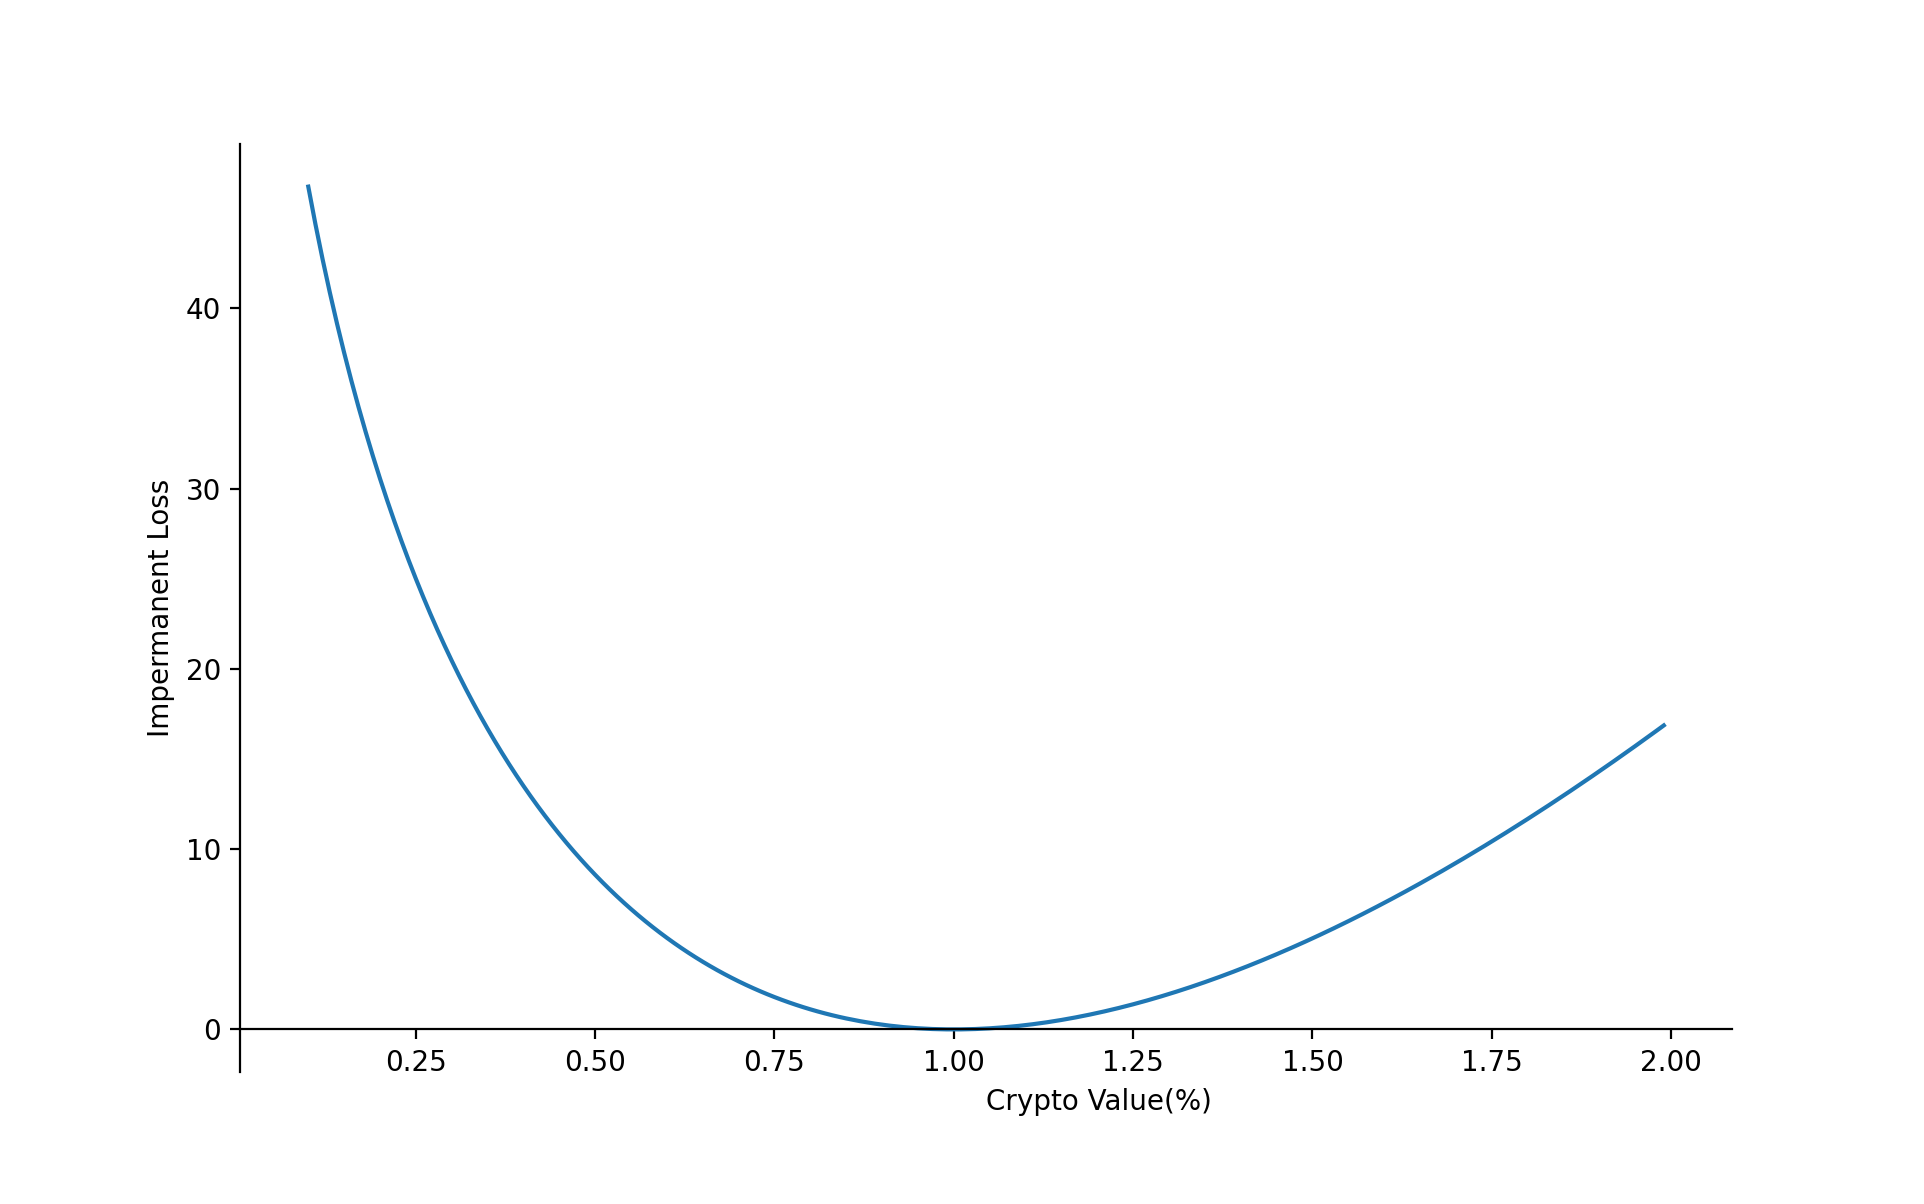

In [45]:
k = x0*y0
y = np.sqrt(k*sT)
x = np.sqrt(k/sT)
IL = 2*y-y0-y**2/y0
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed 
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center

ax.plot(sT/s0,np.abs(IL))

plt.xlabel('Crypto Value(%)', ha='left')
plt.ylabel('Impermanent Loss')
#plt.legend()
plt.show()

## IL Delta

\begin{align*}
\frac{\partial IL}{\partial P_x} = \sqrt{\frac{k}{P_x}} - \frac{k}{y_0}
\end{align*}

<IPython.core.display.Javascript object>


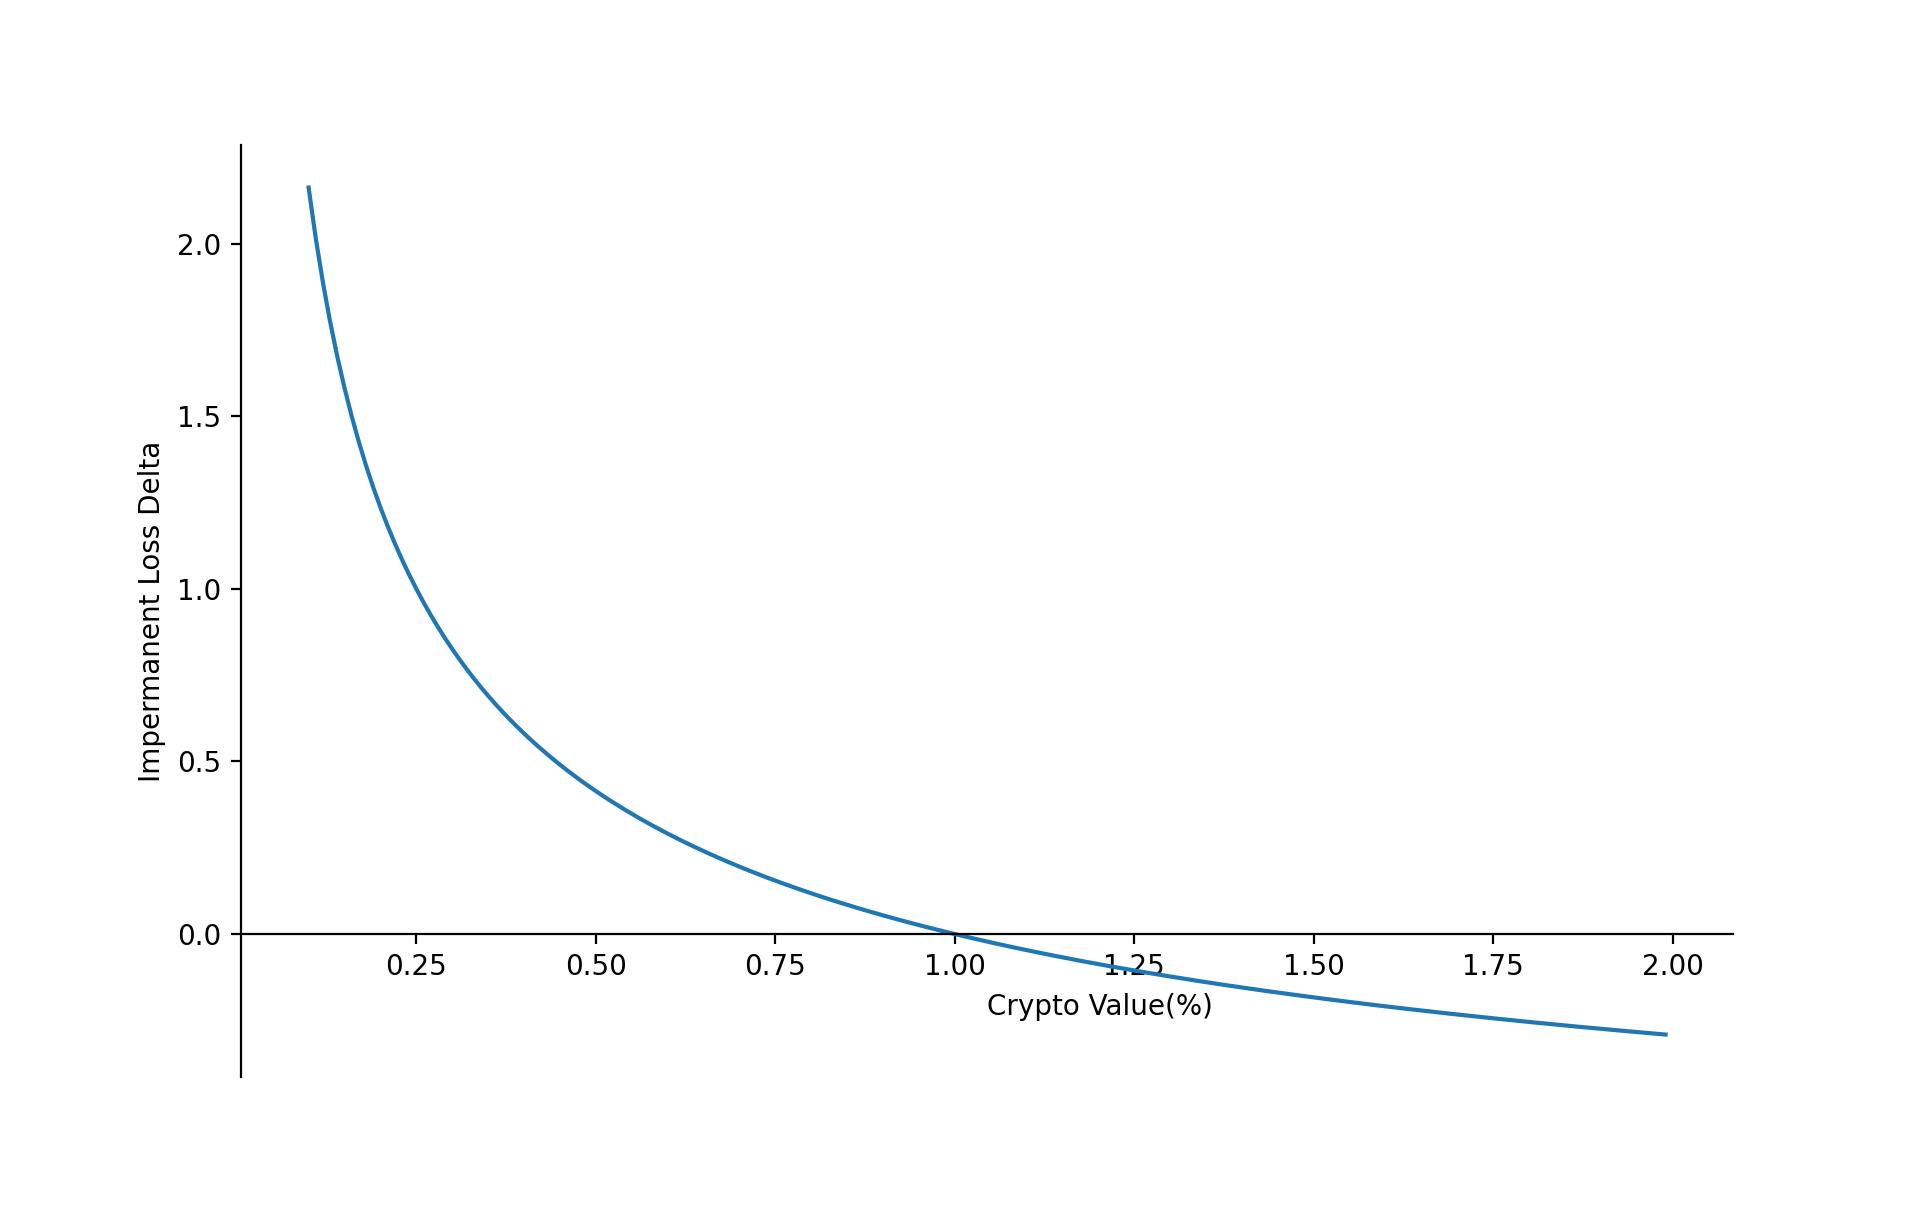

In [43]:
delta = np.sqrt(k/sT)-k/y0
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed 
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center

ax.plot(sT/s0,delta/x0)

plt.xlabel('Crypto Value(%)', ha='left')
plt.ylabel('Impermanent Loss Delta')
#plt.legend()
plt.show()

## Convex Optimization

\begin{align*}
minimize \qquad &\int u(x)(\phi(x)\Delta_{straddle}+\Delta_{IL})^2 dx \\
s.t \qquad \quad&\phi(x)P_{straddle} \leq \psi(x) \\
 & \phi(x)\Gamma_{straddle} +  \Gamma_{IL} = 0
\end{align*}

Bellman equation, time coefficient

<IPython.core.display.Javascript object>


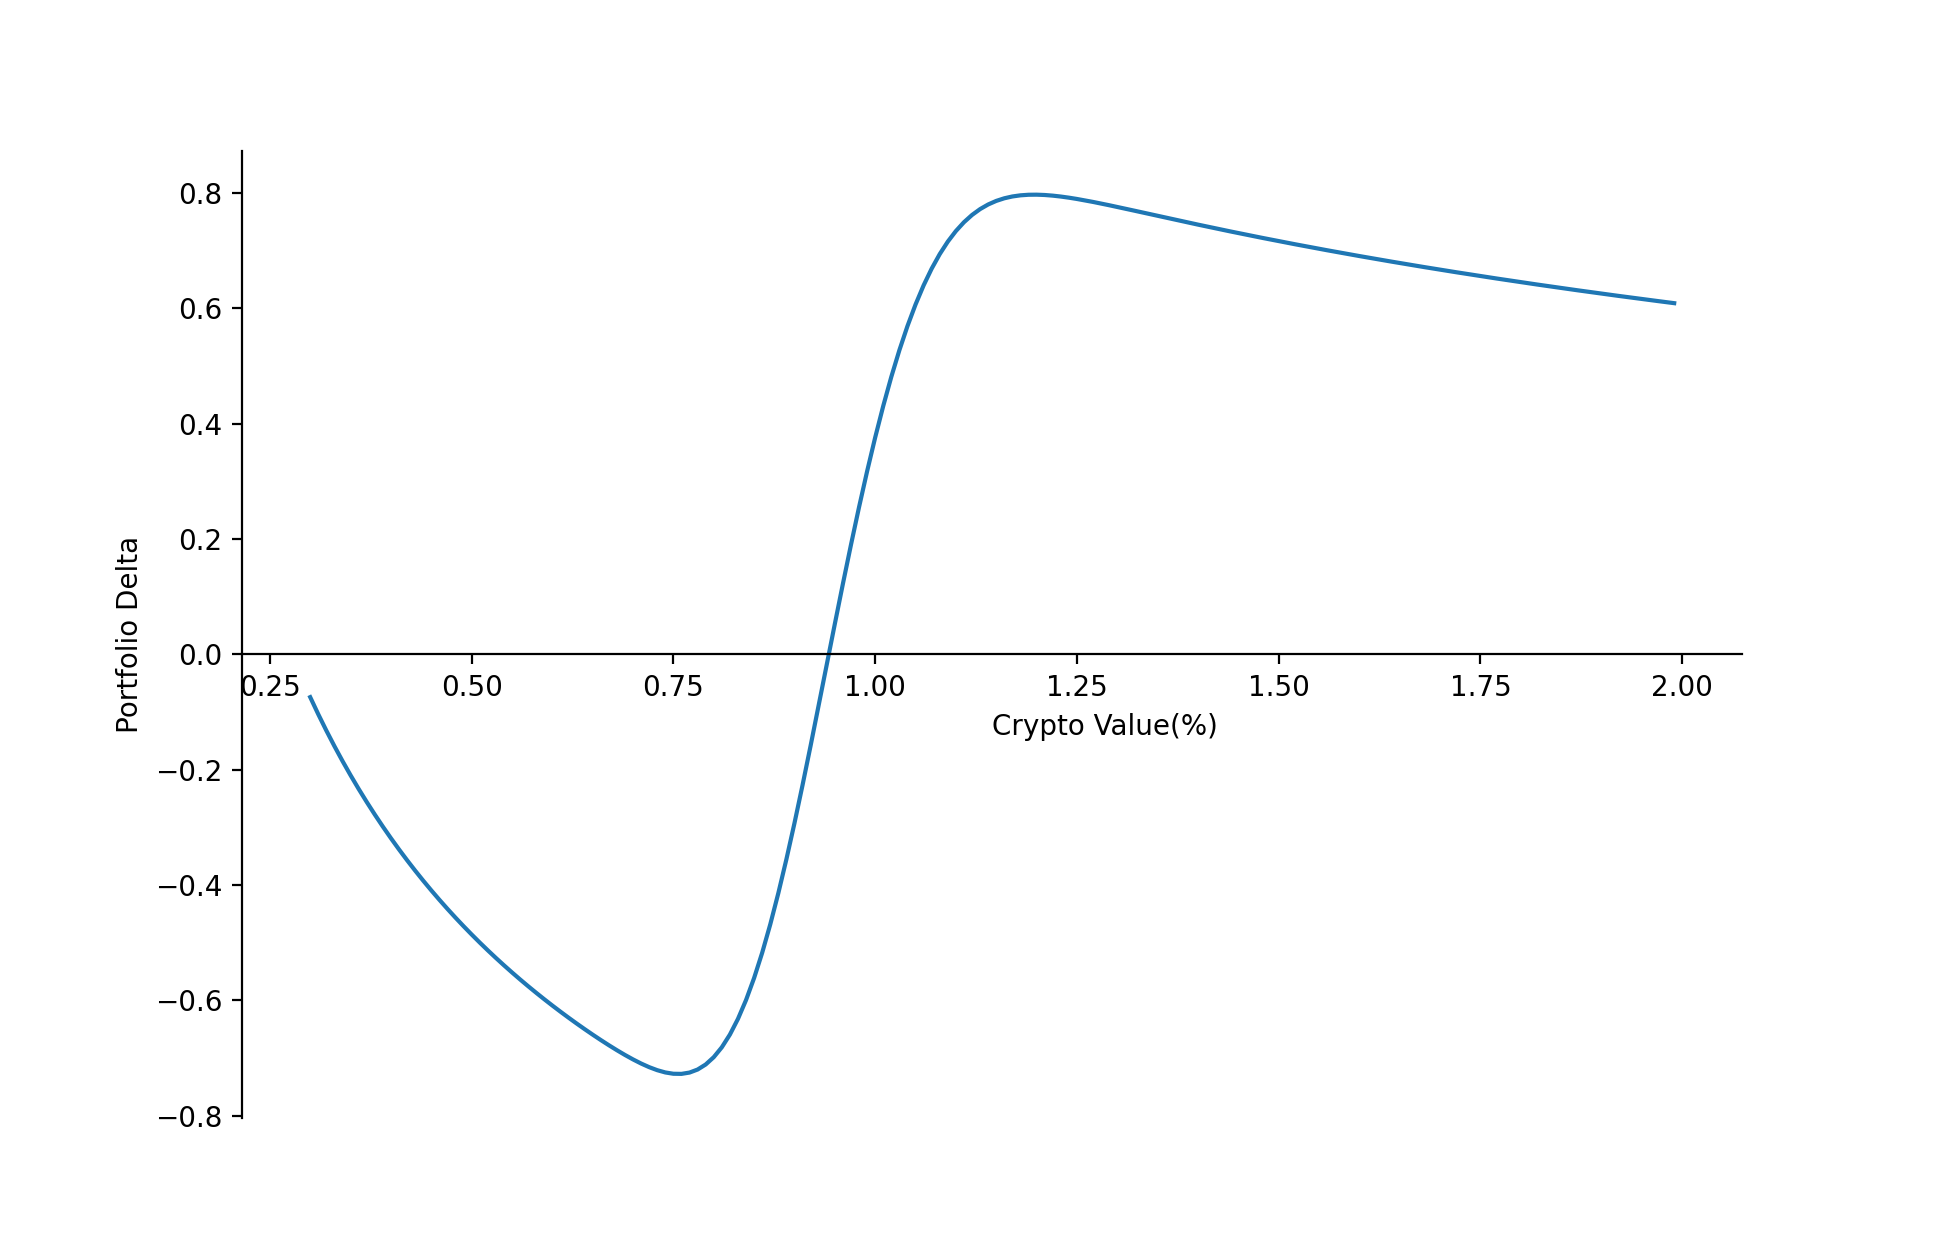

In [47]:
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed 
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center

x_value = (sT/s0)[20:]
y_value = (delta/x0+0.9*(delta_call+delta_put))[20:]
ax.plot(x_value,y_value)

plt.xlabel('Crypto Value(%)', ha='left')
plt.ylabel('Portfolio Delta')
#plt.legend()
plt.show()